In [1]:
# importing pandas module
import pandas as pd

# load the dataset
data = pd.read_csv('C:/Users/ommji_mttma5p/OneDrive/Desktop/edunet/archive (1)/datafile.csv')

# display top 5 values
data.head()

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0


In [2]:
# data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.0+ KB


<Axes: >

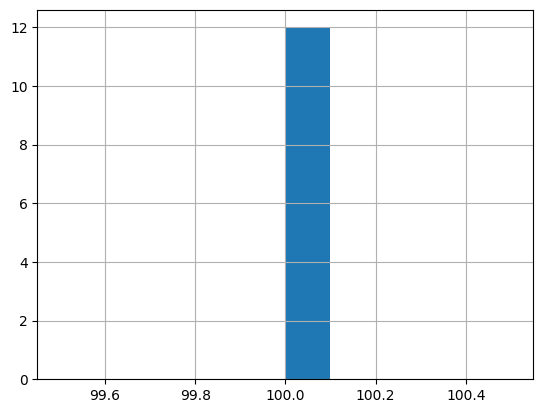

In [3]:
# 2004 crop data in histogram analysis
data['2004-05'].hist()

<Axes: >

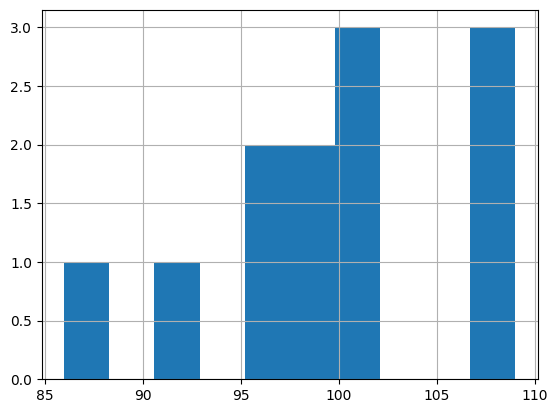

In [4]:
# 2005 crop data in histogram analysis
data['2005-06'].hist()

<Axes: >

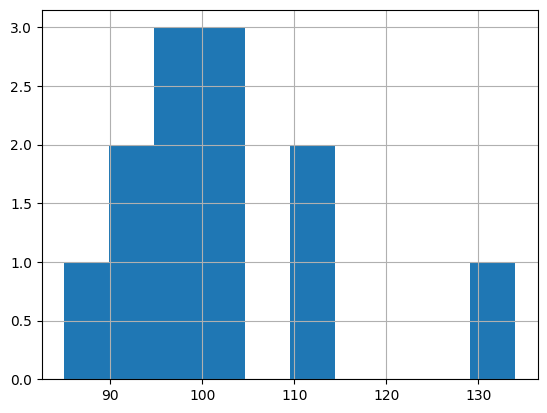

In [5]:
# 2006 crop data in histogram analysis
data['2006-07'].hist()

array([[<Axes: title={'center': '2004-05'}>,
        <Axes: title={'center': '2005-06'}>,
        <Axes: title={'center': '2006-07'}>],
       [<Axes: title={'center': '2007-08'}>,
        <Axes: title={'center': '2008-09'}>,
        <Axes: title={'center': '2009-10'}>],
       [<Axes: title={'center': '2010-11'}>,
        <Axes: title={'center': '2011-12'}>, <Axes: >]], dtype=object)

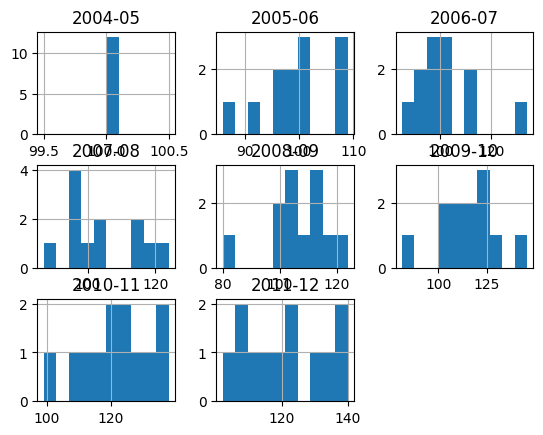

In [6]:
# display all year data
data.hist()

<Axes: xlabel='2006-07', ylabel='2007-08'>

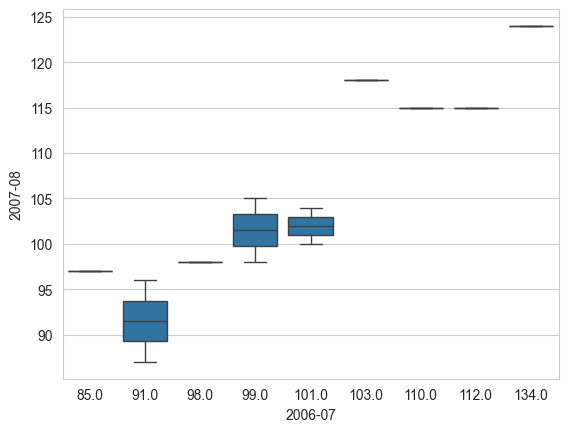

In [7]:
# import seaborn module
import seaborn as sns

# setting style
sns.set_style("whitegrid")

# plotting data using boxplot for 2006 - 2008
sns.boxplot(x='2006-07', y='2007-08', data=data)

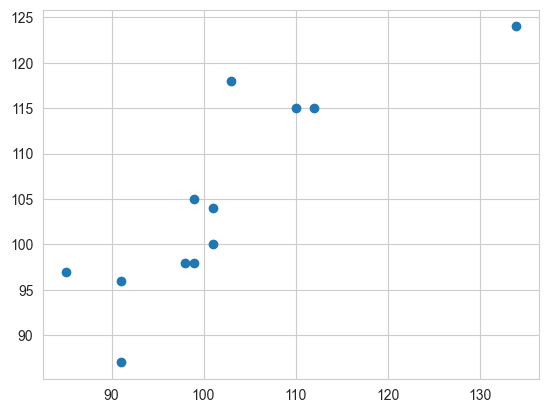

In [8]:
# scatter plot 2013 data vs 2014 data
import matplotlib.pyplot as plt
plt.scatter(data['2006-07'],data['2007-08'])

plt.show()

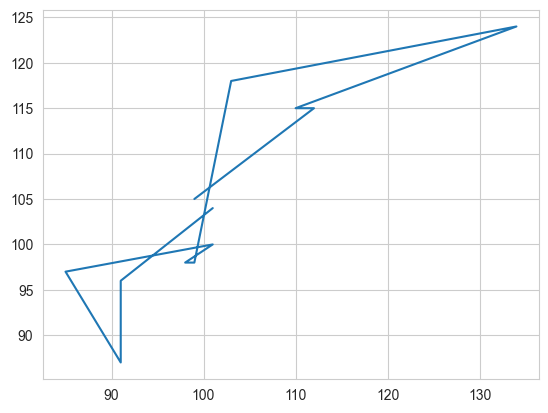

In [9]:
# line plot 2013 data vs 2014 data
plt.plot(data['2006-07'],data['2007-08'])

plt.show()

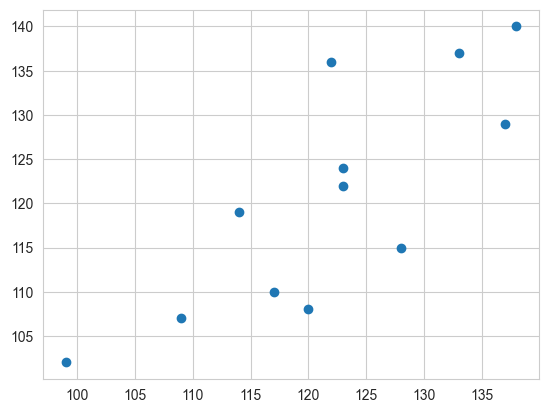

In [10]:
# import required modules
import matplotlib.pyplot as plt
from scipy import stats


# assign data
x = data['2010-11']
y = data['2011-12']


# linear regression 2017 data vs 2018 data
slope, intercept, r, p, std_err = stats.linregress(x, y)


# function to return slope
def myfunc(x):
    return slope * x + intercept


mymodel = list(map(myfunc, x))

# scatter
plt.scatter(x, y)

# plotting the data
plt.plot(x, mymodel)

# display the figure
plt.show()

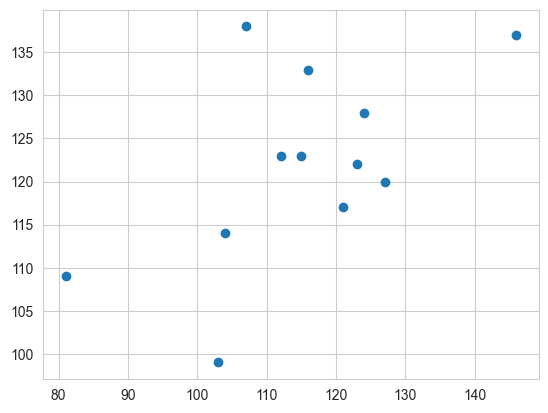

In [12]:
# import required modules
import matplotlib.pyplot as plt
from scipy import stats


# assign data
x = data['2009-10']
y = data['2010-11']


# linear regression 2017 data vs 2018 data
slope, intercept, r, p, std_err = stats.linregress(x, y)


# function to return slope
def myfunc(x):
    return slope * x + intercept


mymodel = list(map(myfunc, x))

# scatter
plt.scatter(x, y)

# plotting the data
plt.plot(x, mymodel)

# display the figure
plt.show()

In [14]:
print(data.index)   # Check if '2009-10' is in the index
print(data.columns) # Check what the column names are


Index(['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
       '2010-11', '2011-12'],
      dtype='object')
Index([               'Rice',               'Wheat',      'Coarse Cereals',
                    'Pulses',         'Vegetables ',              'Fruits',
                      'Milk', 'Eggs, Fish and Meat',            'Oilseeds',
                'Sugarcane ',              'Fibers',     'All Agriculture',
                         nan],
      dtype='object', name='Crop')


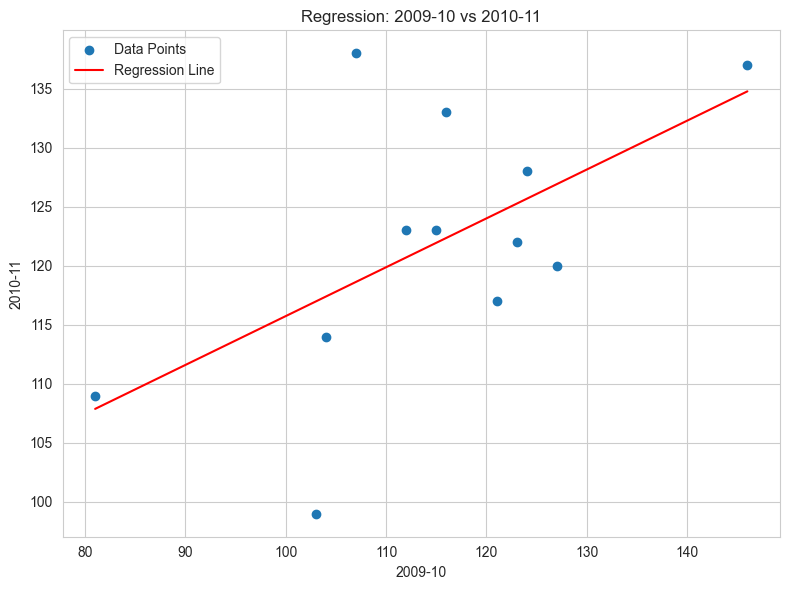

In [15]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Step 1: Load data
data = pd.read_csv('C:/Users/ommji_mttma5p/OneDrive/Desktop/edunet/archive (1)/datafile.csv')

# Step 2: Clean the 'Crop' column
data['Crop'] = data['Crop'].str.strip()  # Remove extra spaces

# Step 3: Drop empty rows (e.g., the one with NaN crop name)
data = data.dropna(subset=['Crop'])

# Step 4: Set 'Crop' as index
data.set_index('Crop', inplace=True)

# Step 5: Transpose so years become index, crops become columns
data = data.transpose()

# Step 6: Select years for regression
x = data.loc['2009-10']
y = data.loc['2010-11']

# Step 7: Linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(val):
    return slope * val + intercept

# Step 8: Regression predictions
x_list = list(x)
mymodel = list(map(myfunc, x_list))

# Step 9: Sort for line plotting
sorted_x, sorted_model = zip(*sorted(zip(x_list, mymodel)))

# Step 10: Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, label='Data Points')
plt.plot(sorted_x, sorted_model, color='red', label='Regression Line')

plt.xlabel('2009-10')
plt.ylabel('2010-11')
plt.title('Regression: 2009-10 vs 2010-11')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
